In [ ]:
import os
import netCDF4
import xarray as xr


# 作業フォルダとデータの指定(自分のpcのフォルダパスをコピペしてください，うまくいかないときは/を二重（//）にしてください)
work_dir = "/home/azusanakano/CHIRPS/data"
data = "chirps-v2.0.annual.nc"  # 入力するファイル名を入力（作業フォルダ内にちゃんと置いてあるか要確認！）
output_file = "average_prec.tif"    # 出力データ


# ファイルの読み込み
fpath = os.path.join(work_dir, data)   # ファイルパスの結合


# データセットを開く
ds = xr.open_dataset(fpath)
ds

<xarray.Dataset> Size: 3GB
Dimensions:    (latitude: 2000, longitude: 7200, time: 44)
Coordinates:
  * latitude   (latitude) float32 8kB -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 29kB -180.0 -179.9 -179.9 ... 179.9 180.0
  * time       (time) datetime64[ns] 352B 1981-01-01 1982-01-01 ... 2024-01-01
Data variables:
    precip     (time, latitude, longitude) float32 3GB ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2025-01-15
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given year.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [14]:
## データの切り出し

lat = slice(40, 45)     # 緯度(データセットによっては指定方法が違うので注意．DatasetのCoordinatesを確認)
lon = slice(72, 82)    # 経度


ds  = ds.sel(latitude=lat, longitude=long)
ds

<xarray.Dataset> Size: 4MB
Dimensions:    (latitude: 100, longitude: 200, time: 44)
Coordinates:
  * latitude   (latitude) float32 400B 40.02 40.07 40.12 ... 44.87 44.92 44.97
  * longitude  (longitude) float32 800B 72.02 72.07 72.12 ... 81.88 81.92 81.98
  * time       (time) datetime64[ns] 352B 1981-01-01 1982-01-01 ... 2024-01-01
Data variables:
    precip     (time, latitude, longitude) float32 4MB ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2025-01-15
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given year.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [ ]:
## 解析
# グリッドごとの降水量の平均値を計算
mean_prec_grid = ds.groupby(['latitude', 'longitude'], squeeze=False).mean()
# 時間方向の平均を計算
mean_prec_2d = mean_prec_grid['precip'].mean(dim='time')


print(mean_prec_grid)

<xarray.Dataset> Size: 4MB
Dimensions:    (latitude: 100, longitude: 200, time: 44)
Coordinates:
  * latitude   (latitude) float32 400B 40.02 40.07 40.12 ... 44.87 44.92 44.97
  * longitude  (longitude) float32 800B 72.02 72.07 72.12 ... 81.88 81.92 81.98
  * time       (time) datetime64[ns] 352B 1981-01-01 1982-01-01 ... 2024-01-01
Data variables:
    precip     (time, latitude, longitude) float32 4MB 372.3 381.2 ... 259.9
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2025-01-15
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given year.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.

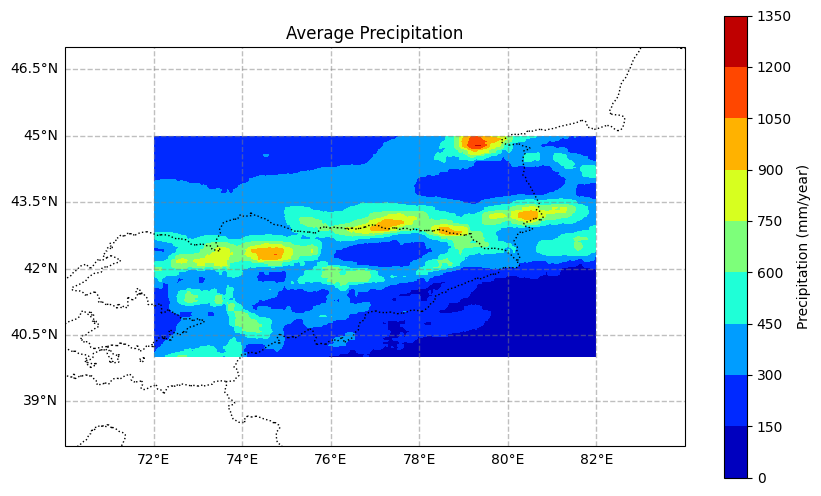

In [16]:
## グラフとして出力
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


# Cartopyで地図を作成
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# 降水量をカラーマップで表示 (修正箇所)
im = ax.contourf(mean_prec_grid.longitude, mean_prec_grid.latitude, mean_prec_2d, cmap='jet')

# カラーバーを表示
plt.colorbar(im, orientation='vertical', label='Precipitation (mm/year)')

# 表示範囲の設定
lat_min, lat_max = lat.start, lat.stop  # 緯度
lon_min, lon_max = lon.start, lon.stop  # 経度
# bufferの設定（最初に指定した範囲からどれくらい表示範囲を広げる or 狭くする）
lat_buffer = 2
lon_buffer = 2
# リスト化してまとめる
extent = [lon_min - lon_buffer, lon_max + lon_buffer, lat_min - lat_buffer, lat_max + lat_buffer]

# 範囲設定を図に適用
ax.set_extent(extent)

# 緯度経度グリッドを表示
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # 上側のラベルを非表示
gl.right_labels = False  # 右側のラベルを非表示
gl.xformatter = LONGITUDE_FORMATTER  # 経度ラベルの書式を設定
gl.yformatter = LATITUDE_FORMATTER   # 緯度ラベルの書式を設定

# タイトルを表示
plt.title('Average Precipitation')

# グラフを表示
plt.show()

In [18]:
# GeoTIFFで出力
try:
    fpath_output = os.path.join(work_dir, output_file)
    mean_prec_2d.rio.to_raster(fpath_output, crs="EPSG:4326")  # 座標系をWGSに指定
    print("ファイルの出力に成功しました")

except Exception as e:
    print(f"ValueError: {e}")

ファイルの出力に成功しました
